### Importing Necessary Packages

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

### Reading the Training Data

In [143]:
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

### Overview of the Train Dataset

In [144]:
train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [145]:
train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


### Reading the Test Data

In [146]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

### Overview of the Test Data

In [147]:
test.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [148]:
test.describe()

,id
count,17197.000000
mean,40561.000000
std,4964.490625
min,31963.000000
25%,36262.000000
50%,40561.000000
75%,44860.000000
max,49159.000000


### Combining the Train and Test Datasets

In [149]:
df = train.append(test, ignore_index=True, sort=True)

In [150]:
df.head(10)

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...
7,8,0.0,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...


In [151]:
df.tail(10)

,id,label,tweet
49149,49150,NaN,loving lifeðºð¸âï¸ð #createyourfutu...
49150,49151,NaN,"black professor demonizes, proposes nazi style..."
49151,49152,NaN,learn how to think positive. #positive #ins...
49152,49153,NaN,"we love the pretty, happy and fresh you! #teen..."
49153,49154,NaN,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


### Data Preprocessing

In [152]:
def remove_words(input_text, word_pattern):
    text = re.findall(word_pattern, input_text)
    
    for i in text:
        input_text = re.sub(i, "", input_text)
    return input_text

#### Removing '@user' from the tweets

In [153]:
df['Tweets'] = np.vectorize(remove_words)(df['tweet'], "@[\w]*")
df = df.drop('tweet', axis=1)

In [154]:
def remove_special_chars(input_text):
    text = re.sub('[^A-Za-z]+',' ',input_text)
    return text

In [155]:
df['Tweets'] = df['Tweets'].apply(remove_special_chars)

In [156]:
df.head(10)

,id,label,Tweets
0,1,0.0,when a father is dysfunctional and is so self...
1,2,0.0,thanks for lyft credit i can t use cause they...
2,3,0.0,bihday your majesty
3,4,0.0,model i love u take with u all the time in ur
4,5,0.0,factsguide society now motivation
5,6,0.0,huge fan fare and big talking before they lea...
6,7,0.0,camping tomorrow danny
7,8,0.0,the next school year is the year for exams can...
8,9,0.0,we won love the land allin cavs champions clev...
9,10,0.0,welcome here i m it s so gr


#### Removing words with len < 3

In [157]:
def remove_short_words(input_text):
    return ' '.join([word for word in input_text.split() if len(word) >= 4])

In [158]:
df['Tweets'] = df['Tweets'].apply(remove_short_words)

In [159]:
df.head(10)

,id,label,Tweets
0,1,0.0,when father dysfunctional selfish drags kids i...
1,2,0.0,thanks lyft credit cause they offer wheelchair...
2,3,0.0,bihday your majesty
3,4,0.0,model love take with time
4,5,0.0,factsguide society motivation
5,6,0.0,huge fare talking before they leave chaos disp...
6,7,0.0,camping tomorrow danny
7,8,0.0,next school year year exams think about that s...
8,9,0.0,love land allin cavs champions cleveland cleve...
9,10,0.0,welcome here


In [160]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [75]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Divyashree
[nltk_data]     Rao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [161]:
def tokenize_and_stem(input_text):
    tokens = word_tokenize(input_text)
    porter_stemmer = PorterStemmer()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [162]:
df['Tweets'] = df['Tweets'].apply(tokenize_and_stem)

In [163]:
df.head(10)

,id,label,Tweets
0,1,0.0,when father dysfunct selfish drag kid into dys...
1,2,0.0,thank lyft credit caus they offer wheelchair v...
2,3,0.0,bihday your majesti
3,4,0.0,model love take with time
4,5,0.0,factsguid societi motiv
5,6,0.0,huge fare talk befor they leav chao disput whe...
6,7,0.0,camp tomorrow danni
7,8,0.0,next school year year exam think about that sc...
8,9,0.0,love land allin cav champion cleveland clevela...
9,10,0.0,welcom here


### Data Visualization

In [164]:
import random

def generate_random_colours(number):
    colours = []
    for i in range(number):
        colours.append("#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
        return colours

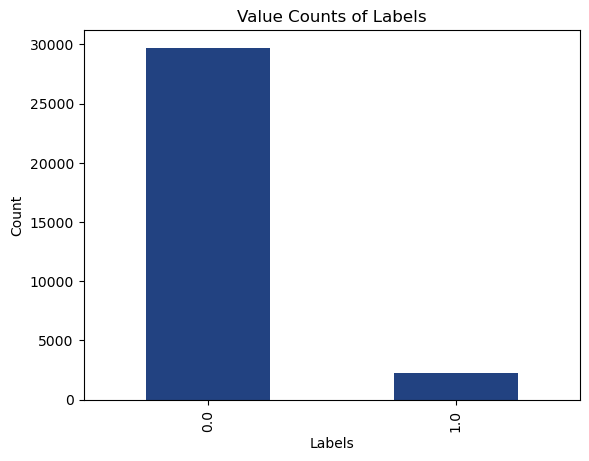

In [165]:
value_counts = df['label'].value_counts()
value_counts.plot(kind='bar', color = generate_random_colours(1))

plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Value Counts of Labels')
plt.show()

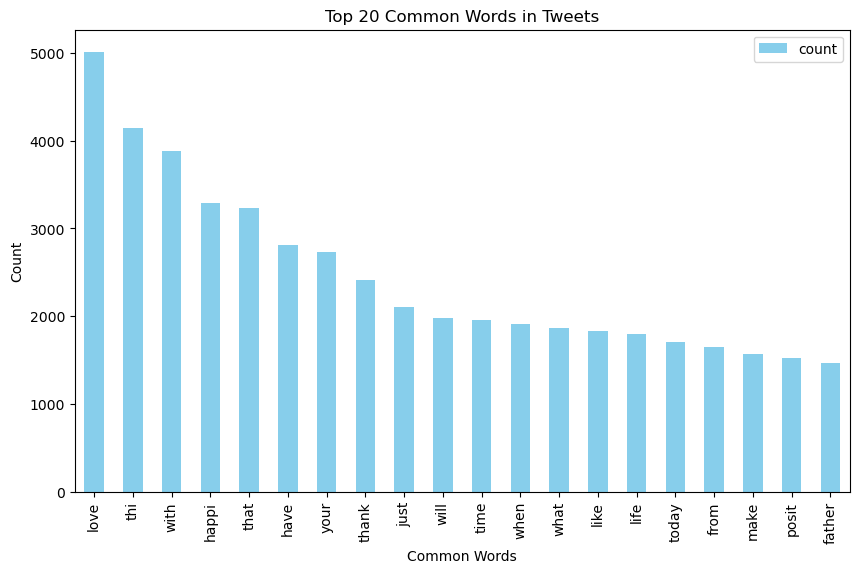

In [166]:
from collections import Counter

temp = df['Tweets'].apply(lambda x: str(x).split())
top = Counter([item for sublist in temp for item in sublist])
temp2 = pd.DataFrame(top.most_common(20), columns = ['Common_words', 'count'])

fig, ax = plt.subplots(figsize = (10,6))
temp2.plot(kind = 'bar', x='Common_words', y='count', ax=ax, color='skyblue')
ax.set_xlabel('Common Words')
ax.set_ylabel('Count')
ax.set_title('Top 20 Common Words in Tweets')

plt.show()

In [167]:
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

fig = px.bar(temp2, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [168]:
fig = px.treemap(temp2, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

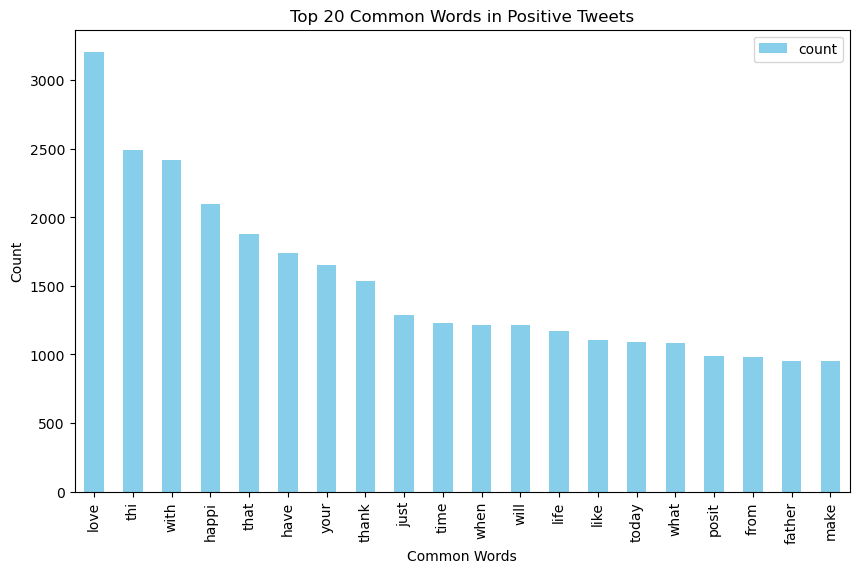

In [169]:
from collections import Counter
positive_tweets = df[df['label'] == 0]
temp = positive_tweets['Tweets'].apply(lambda x: str(x).split())
top = Counter([item for sublist in temp for item in sublist])
temp2 = pd.DataFrame(top.most_common(20), columns=['Common_words', 'count'])

fig, ax = plt.subplots(figsize=(10, 6))
temp2.plot(kind='bar', x='Common_words', y='count', ax=ax, color='skyblue')
ax.set_xlabel('Common Words')
ax.set_ylabel('Count')
ax.set_title('Top 20 Common Words in Positive Tweets')

plt.show()

In [170]:
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

fig = px.bar(temp2, x="count", y="Common_words", title='Commmon Words in Selected Text of Positive Tweets', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [171]:
fig = px.treemap(temp2, path=['Common_words'], values='count',title='Tree of Most Common Words in Positive Tweets')
fig.show()

In [172]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [173]:
positive_tweets = df[df['label'] == 0]
all_positive_words = ' '.join(positive_tweets['Tweets'])
positive_words_list = all_positive_words.split()


print(positive_words_list[:10])

['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', 'thank', 'lyft']


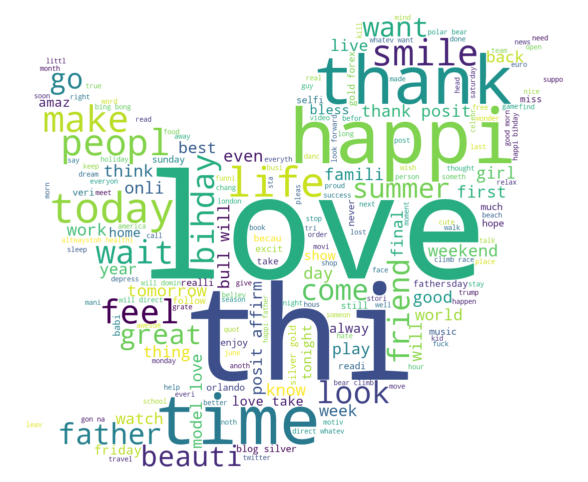

In [174]:
from wordcloud import WordCloud
from PIL import Image
import requests
from io import BytesIO
positive_words_str = ' '.join(positive_words_list)

image_url = 'http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png'
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
mask = np.array(img)

wordcloud = WordCloud(width=1000, height=800, background_color='white', mask=mask).generate(positive_words_str)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


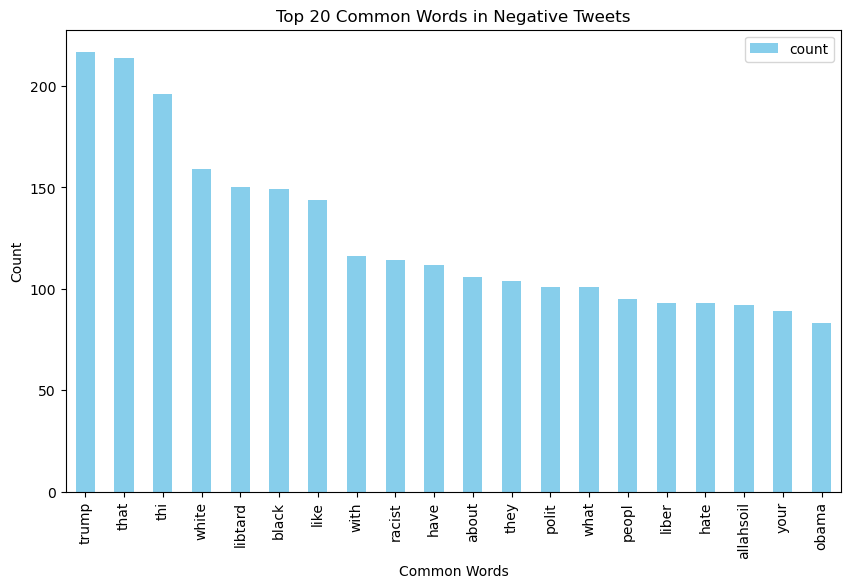

In [175]:
from collections import Counter
negative_tweets = df[df['label'] == 1]
temp = negative_tweets['Tweets'].apply(lambda x: str(x).split())
top = Counter([item for sublist in temp for item in sublist])
temp2 = pd.DataFrame(top.most_common(20), columns=['Common_words', 'count'])

fig, ax = plt.subplots(figsize=(10, 6))
temp2.plot(kind='bar', x='Common_words', y='count', ax=ax, color='skyblue')
ax.set_xlabel('Common Words')
ax.set_ylabel('Count')
ax.set_title('Top 20 Common Words in Negative Tweets')

plt.show()

In [176]:
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

fig = px.bar(temp2, x="count", y="Common_words", title='Commmon Words in Selected Text of Negative Tweets', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [177]:
fig = px.treemap(temp2, path=['Common_words'], values='count',title='Tree of Most Common Words in Negative Tweets')
fig.show()

In [178]:
negative_tweets = df[df['label'] == 1]
all_negative_words = ' '.join(negative_tweets['Tweets'])
negative_words_list = all_negative_words.split()


print(negative_words_list[:10])

['call', 'michigan', 'middl', 'school', 'build', 'wall', 'chant', 'tcot', 'comment', 'australia']


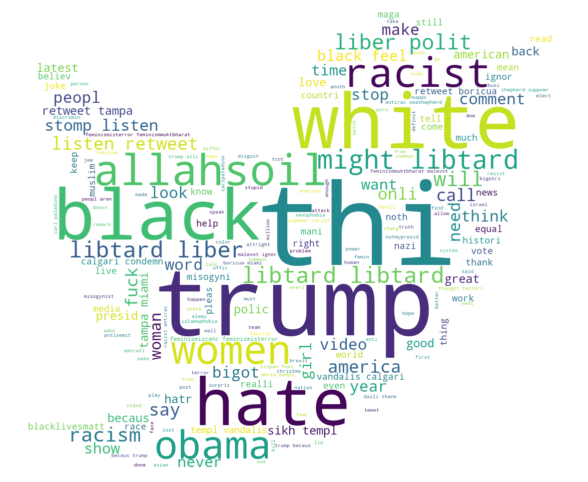

In [179]:
from wordcloud import WordCloud
from PIL import Image
import requests
from io import BytesIO
negative_words_str = ' '.join(negative_words_list)

image_url = 'http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png'
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
mask = np.array(img)

wordcloud = WordCloud(width=1000, height=800, background_color='white', mask=mask).generate(negative_words_str)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Modelling

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf = TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix = tfidf.fit_transform(df['Tweets'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:
train_tfidf_matrix = tfidf_matrix[:31962]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [183]:
from sklearn.model_selection import train_test_split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(train_tfidf_matrix, train['label'], test_size=0.3, random_state=42)

#### Logistic Regression Model

In [184]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [185]:
Log_Reg.fit(X_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [191]:
pred_tfidf = Log_Reg.predict_proba(X_test_tfidf)
pred_tfidf

array([[0.97932056, 0.02067944],
       [0.9809021 , 0.0190979 ],
       [0.88035719, 0.11964281],
       ...,
       [0.94485669, 0.05514331],
       [0.61841245, 0.38158755],
       [0.94586499, 0.05413501]])

In [187]:
pred_int = pred_tfidf[:,1]>=0.3
pred_int = pred_int.astype(np.int)

log_tfidf_f1 = f1_score(y_test_tfidf, pred_int)
log_tfidf_f1

0.5380530973451326

In [189]:
pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


#### XGBoost Model

In [192]:
from xgboost import XGBClassifier

In [195]:
xgb_model = XGBClassifier(random_state = 42, learning_rate = 0.7)
xgb_model.fit(X_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [196]:
xgb_pred_tfidf = xgb_model.predict_proba(X_test_tfidf)
xgb_pred_tfidf

array([[9.9969697e-01, 3.0301674e-04],
       [9.8791677e-01, 1.2083223e-02],
       [9.4729650e-01, 5.2703511e-02],
       ...,
       [9.8469591e-01, 1.5304099e-02],
       [2.5775158e-01, 7.4224842e-01],
       [9.5944697e-01, 4.0553056e-02]], dtype=float32)

In [201]:
xgb_pred_int = xgb_pred_tfidf[:,1]>=0.3
xgb_pred_int = xgb_pred_int.astype(np.int)

xgb_tfidf_f1 = f1_score(y_test_tfidf, xgb_pred_int)
xgb_tfidf_f1

0.548361310951239

#### Decision Tree Modelling

In [198]:
from sklearn.tree import DecisionTreeClassifier
DecTree = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [200]:
DecTree.fit(X_train_tfidf, y_train_tfidf)
tree_pred_tfidf = DecTree.predict_proba(X_test_tfidf)
tree_pred_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [202]:
tree_pred_int = tree_pred_tfidf[:,1]>=0.3
tree_pred_int = tree_pred_int.astype(np.int)

tree_tfidf_f1 = f1_score(y_test_tfidf, tree_pred_int)
tree_tfidf_f1

0.508716323296355

In [203]:
Algorithms = ['Logistic regression', 'XGBoost', 'Decision tree']
f1_scores = [log_tfidf_f1, xgb_tfidf_f1, tree_tfidf_f1]
comparison = pd.DataFrame({'Model':Algorithms,'F1_Score':f1_scores},index=[i for i in range(1,4)])

comparison

,Model,F1_Score
1,Logistic regression,0.538053
2,XGBoost,0.548361
3,Decision tree,0.508716


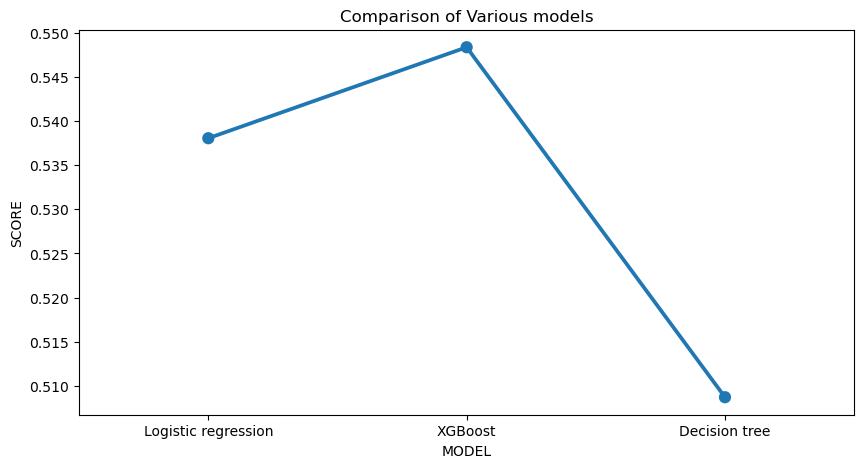

In [208]:
plt.figure(figsize=(10,5))

sns.pointplot(x='Model',y='F1_Score',data=comparison)

plt.title('Comparison of Various models')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

### Testing the Results

In [209]:
test_tfidf = tfidf_matrix[31962:]
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int

submission = test[['id','label']]
submission.to_csv('result.csv', index=False)

In [210]:
res = pd.read_csv('result.csv')
res

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
